<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 2*

---
# N422. 경사하강법과 역전파 알고리즘

## Warm up

다음 영상을 시청해 주세요 :)

하나를 하더라도 직접 계산해보는 것이 좋고, 프로그램으로 만들어보면 더 이해가 잘 됩니다. 


- [3Blue1Brown-역전파 미적분, 딥러닝](https://youtu.be/tIeHLnjs5U8)
- [학습과정을 잘 모식화한 영상 - 역전파](https://youtu.be/GlcnxUlrtek)
- [backpropagation example](https://www.youtube.com/watch?v=0e0z28wAWfg)


# 지난시간 복습
- 인공지능의 역사
- 퍼셉트론과 Gate
- 신경망의 기본 구조
  * input - dendrite
  * activation - Axon Hilock
  * output - Axon
- 신경망의 동작 원리
  * 데이터 전처리 및 입력
  * 모델 제작 및 가중치 초기화
  * 모델에 데이터를 넣고 출력값을 얻음
  * 출력값과 레이블(정답지)과 비교 후 Loss 계산
  * Loss를 반영하여 가중치 업데이트 -> 역전파(BackPropagation) + 경사하강법(Gradient Descent)

# 🏆 학습목표

* 경사하강법과 역전파 알고리즘에 대해 이해하고 설명할 수 있다.
* 경사하강법과 역전파 알고리즘을 사용하여 신경망을 구현할 수 있다.
* 케라스 프레임워크를 이용하여 모델을 구축할 수 있다.

## 신경망 구조 (recap.)

오늘은 조금 더 깊이 있게 신경망 훈련 방법에 대해서 살펴볼 것 입니다. 순방향 신경망(FP)과 같은 다층퍼셉트론(MLP, Multi-layer Perceptron) 구조의 신경망은 경사하강법(Gradient descent, GD)으로 학습을 할 수 있는데 역전파(Backpropagationm, BP) 알고리즘에 의해 필요한 기울기(gradient)계산이 가능합니다.

신경망 구조에 대해 다시 간략히 짚어보겠습니다:

<img src="https://www.researchgate.net/profile/Daniela_Guimaraes4/publication/328369102/figure/fig1/AS:683451942457344@1539959049109/Representation-of-the-artificial-neural-networks-showing-the-weights-w-and-the-bias-b.png" alt="Representation of the artificial neural networks showing the weights (w) and the bias (b)."/>

- 입력층(Input layer), 은닉층(Hidden layer), 출력층(output layer)이 존재합니다.
- 각 층은 **n** 개의 뉴런(노드, activation units)으로 구성되어 있곡 각각 가중치(weight)와 편향(bias)를 가지고 있습니다.
- 왼쪽 입력층에서부터 오른쪽으로 층에서 층으로 데이터가 전달되는데 다음과 같습니다:
    - 훈련데이터를 입력층으로부터(이전 층으로부터) 받습니다.
    - 입력데이터는 가중치와 가중합(weighted sum)을 합니다.
    - 편향(bias)이 더해집니다.
    - 편향이 더해진 가중합은 활성화함수(activation function)를 통해 다음 층으로 전달됩니다. 입력의 특성이 n개인 경우 전달되는 값은 다음식과 같습니다.

\begin{align}
 y = sigmoid(\sum(w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n}) + bias)
\end{align}
 

### 신경망 학습 알고리즘 요약:

0. 학습할 신경망 구조를 선택합니다.
    - 입력층 유닛의 수 = 특징 수
    - 출력층 유닛의 수 = 타겟 클래스 수
    - 은닉층 수, 각 은닉층의 노드 수
1. 가중치 랜덤 초기화
2. 순방향 전파를 통해 $h_{\theta}(x^{(i)})$(출력층 y값) 을 모든 입력 $x^{(i)}$에 대해 계산합니다.
3. 비용함수를 $J(\theta)$를 계산합니다.
4. 역방향 전파를 통해 편미분 값들 $\frac{\delta}{\delta\theta_{jk}^{l}}{J(\theta)}$ 을 계산합니다.
5. 경사하강법 (or 다른 최적화 알고리즘)을 역전파와 함께 사용하여 비용함수인 $J(\theta)$ 를 최소화 합니다.
6. 어떤 중지 기준을 충족하거나 비용함수를 최소화 할 때까지 단계 2-5를 반복합니다. 2-5를 한 번 진행하는 것을 epoch 또는 iteration이라 말합니다.

### 비용(cost), 손실(loss), 에러(error) 함수 계산

신경망의 성능을 어떻게 측정하기 위해서는 비용함수를 계산해야 합니다. 한 데이터 샘플을 Forward Propagation를 시키고 마지막 출력층을 통과한 값과 이 데이터의 타겟값을 비교하여 loss or error를 계산합니다. 여기서 한 데이터 포인트에서의 손실을 loss라 하고 전체 데이터 셋의 loss를 합한 개념을 cost라고 합니다.


신경망을 훈련시키기 위해서는 다른 머신러닝 알고리즘들 보다 **훨씬 많은** 훈련 데이터가 필요하고 그에 따라 훈련 시간도 오래 걸리며 더 많은 **하이퍼파라미터를 튜닝**해야 합니다. 이렇게 복잡한 신경망을 훈련하기 위해서는 특별한 방법이 필요합니다, 바로 역전파 알고리즘 입니다.

그럼 이제 신경망을 훈련시키는 역전파 알고리즘을 제대로 배워보도록 하겠습니다.


# Backpropagation (BP)

역전파(Backpropagation)는 ["Backwards Propagation of errors"](https://en.wikipedia.org/wiki/Backpropagation)의 줄임말 입니다. 신경망에 존재하는 가중치들을 어떻게 업데이트 해야할지 결정하기 위해 epoch 마다 출력층에서 입력층 방향(역방향)으로 미분값을 계산하고 가중치를 업데이트 하여 신경망을 학습하는 알고리즘입니다. 지금까지 배운 알고리즘 중 가장 복잡한 수식을 보여주는데 미분법에 대한 이해가 약간 필요합니다. 역전파과정의 수식에 대한 설명은 다음 영상들
- [3Blue1Brown-역전파 미분법, 심층 학습, 4장](https://youtu.be/tIeHLnjs5U8)
- [Neural Networks Demystified [Part 4: Backpropagation]](https://youtu.be/GlcnxUlrtek)

을 꼭 참고하여 주시기 바랍니다.

지난 시간에 NN의 Forward Propagation (FP)에 대해서 배워보았습니다. 

간단하게나마 미리보기를 통해서 GD, BP에 대해서도 다뤄보았죠. 한번 듣고 이해하기 어렵기 때문에 다시한번 수행해보겠습니다.



<img src="https://i.imgur.com/Y5XVbrp.png" title="https://becominghuman.ai/understanding-the-structure-of-neural-networks-1fa5bd17fef0" width="600" />

**예제를 통해서 이해해보자** <br>
데이터는 선형함수를 통해서 나왔다고 가정합시다

$y = 5x_1 + 2x_2 + 40$

$x_1$: 공부시간

$x_2$: 수면시간

In [ ]:
# 해당 코드는 선형함수를 예측하는 예제입니다. 
import numpy as np

np.random.seed(812)

# [공부시간, 수면시간]
X = np.array(([8,8],
              [2,5],
              [7,6]), dtype=float)

# 시험 점수
y = X[:,0]*5 + X[:,1]*2
y = y.reshape(3,1)

## 특성 정규화(Feature Normalization)
# 신경망 학습과정 중에 정규화가 진행되나 지금은 빠른 수렴을 위해 특성을 정규화하여 진행하겠습니다.
X = X / np.amax(X, axis=0)
y = y / np.amax(y, axis=0)

print("공부시간, 수면시간 \n", X)
print("시험점수 \n", y)

공부시간, 수면시간 
 [[1.    1.   ]
 [0.25  0.625]
 [0.875 0.75 ]]
시험점수 
 [[1.        ]
 [0.35714286]
 [0.83928571]]


신경망 클래스 내 __init__ 메소드에서 신경망의 구조를 결정합니다.

In [ ]:
# Neural network를 정의하는 Class를 제작하는 코드입니다. 
class NeuralNetwork:
    
    def __init__(self):
        # 신경망의 구조를 결정합니다. 입력층 2 노드, 은닉층 3 노드, 출력층 1 노드
        self.inputs = 2       # 입력노드 수
        self.hiddenNodes = 3  # 히든노드 수
        self.outputNodes = 1  # 출력노드 수
        
        # 가중치를 초기화 합니다.
        # layer 1 가중치 (2x3)
        self.w1 = np.random.randn(self.inputs,self.hiddenNodes)
        
        # layer 2 가중치 (3x1)
        self.w2 = np.random.randn(self.hiddenNodes, self.outputNodes)

### 초기 무작위 가중치
완전연결계층(Fully-connected Layers) 신경망일 경우 얼마나 많은 가중치 변수를 만들어야 할까요?

In [ ]:
# 정의된 클래스를 사용해보고, 해당 가중치를 디스플레이 하는 코드입니다. 
nn = NeuralNetwork()

print("Layer 1 가중치: \n", nn.w1)
print("Layer 2 가중치: \n", nn.w2)

Layer 1 가중치: 
 [[ 2.48783189  0.11697987 -1.97118428]
 [-0.48325593 -1.50361209  0.57515126]]
Layer 2 가중치: 
 [[-0.20672583]
 [ 0.41271104]
 [-0.57757999]]


[참고] 행렬(Array)을 이용하여 연산을 할 때, 참고하실 수 있는 자료 입니다.
- [l x m] * [m x n] = [l x n] 행렬의 형태로 연산이됩니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/18/Matrix_multiplication_qtl1.svg" width="450" />

### 순방향 기능 구현

순방향 전파 기능 구현 후 신경망은 출력값을 내보낼 수 있게 됩니다.

In [ ]:
# Neural network class를 기능을 추가하여 다시 정의하는 코드입니다. 
# "def feed_forward(self, X):"부분을 추가로 정의한 것을 볼 수 있습니다. 

class NeuralNetwork:
    
    def __init__(self):
       # 신경망의 구조를 결정합니다. 입력층 2 노드, 은닉층 3 노드, 출력층 1 노드
        self.inputs = 2
        self.hiddenNodes = 3
        self.outputNodes = 1
        
        # 가중치를 초기화 합니다.
        # layer 1 가중치 (2x3)
        self.w1 = np.random.randn(self.inputs,self.hiddenNodes)
        
        # layer 2 가중치 (3x1)
        self.w2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def feed_forward(self, X):        
        # 가중합 계산
        self.hidden_sum = np.dot(X, self.w1)
        
        # 활성화함수
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # 출력층에서 사용할 은닉층의 각 노드의 출력값을 가중합 합니다.
        self.output_sum = np.dot(self.activated_hidden, self.w2)
        
        # 출력층 활성화, 예측값을 출력합니다.
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output

In [ ]:
# 예측을 수행해 봅시다.
nn = NeuralNetwork()
print(X[0])
output = nn.feed_forward(X[0])
print("예측값: ", output)

[1. 1.]
예측값:  [0.21945787]


### Error 계산

In [ ]:
error = y[0] - output
error

array([0.78054213])

In [ ]:
# 모든 데이터를 예측해보고 에러값을 계산해 보겠습니다.
# print(X)
output_all = nn.feed_forward(X)
error_all = y - output_all
print(output_all)
print(error_all)

[[0.21945787]
 [0.34573206]
 [0.23788921]]
[[0.78054213]
 [0.0114108 ]
 [0.6013965 ]]


**에러값이 높게 나오는 이유는 무엇일까요?** 
- 에러가 높은 이유는 예측값이 낮게(정확하지 않게) 나오기 때문입니다.

**예측값이 낮게 나오는 이유는 무엇일까요?** 

- Random으로 가중치를 만들었기 때문이고, 조금 더 자세히 말하면,
- 두번째 층의 가중치값($w2$)들이 낮기 때문이거나
- 첫번째 층의 출력값($activatedHidden_1 * w2$)이 낮기 때문입니다.

첫번째 층의 출력값($hiddenSum_1$)은 어떤 값들의 계산으로 나오게 되나요?

- 입력값(고정, 변하지 않음)

- 가중치(variable, parameters)

이 두 변수의 가중합으로 이루어 집니다.

입력값은 고정값이기 때문에 이 상황에서 예측값을 증가시키기 위한 방법은 첫번째 층과 두번째층의 가중치를 증가하는 방법밖에 없습니다.

각 층의 노드들 마다 가중치가 존재하는데요, 원하는 결과를 얻기 위해서는 어떤 가중치를 얼마만큼 올려주는 것이 가장 효과적일까요?

이미 높은 활성화값을 가지고 있는 노드의 가중치를 올리면 상대적으로 큰 효과가 없을 것 입니다.

어떤 층의 어떤 노드들의 가중치를 얼마나 올려야 할까요?

한번 가중치들을 눈으로 살펴 보겠습니다.

In [ ]:
# 각각의 변수들을 디스플레이 하기위한 코드입니다.
attributes = ['w1', 'hidden_sum', 'activated_hidden', 'w2', 'activated_output']
for i in attributes:
    if i[:2] != '__':
        print(i+'\n', getattr(nn,i), '\n'+'---'*3)

w1
 [[-1.75351135  1.23279898  0.24464757]
 [-0.06568225  0.30190098  0.79723428]] 
---------
hidden_sum
 [[-1.8191936   1.53469996  1.04188185]
 [-0.47942924  0.49688786  0.55943332]
 [-1.58358412  1.30512484  0.81199233]] 
---------
activated_hidden
 [[0.13953066 0.82269293 0.73921295]
 [0.38238691 0.62172769 0.63632141]
 [0.17028848 0.78669622 0.6925339 ]] 
---------
w2
 [[ 1.23073545]
 [-1.52187331]
 [-0.25502715]] 
---------
activated_output
 [[0.21945787]
 [0.34573206]
 [0.23788921]] 
---------


### Error를 줄이기 위해서는?
- 경사(Gradient)를 계산해서 경사가 작아지도록 가중치를 업데이트!

<img src="https://www.researchgate.net/profile/Wenqiang_Feng2/publication/331482292/figure/fig13/AS:750825655762952@1556022194488/Gradient-Descent-in-1D.jpg" alt="Gradient Descent in 1D" width="400"/>

위의 신경망 알고리즘 단계 2-4를 주어진 배치에 해당하는 모든 관측치에 대해 적용을 합니다. 

비용함수의 기울기와 연관된 가중치를 업데이트 합니다.

우리 신경망은 전체 9개의 가중치를 가지고 있습니다.(첫번째 층 6개, 두번째 층 3개) 그러므로 경사하강법에서 나오는 기울기는 어떤 9차원 공간의 함수에서 가장 아래쪽 방향으로 향하는 (오류를 줄이는 방향)벡터가 될 것입니다.

네트워크에 9 개의 가중치가 있으므로 경사 하강 계산에서 나오는 기울기는 9 차원 공간의 일부 기능을 따라 가장 아래쪽 방향으로 이동하는 벡터가됩니다.

\begin{align}
C(w1, w2, w3, w4, w5, w6, w7, w8, w9)
\end{align}

물론 여러분이 생각해야 할 것은 복잡한 신경망 모델은 대부분 convex 함수가 아니라는 것입니다. 그래서 경사하강법은 종종 지역 최소값에 빠질 수 있다는 것입니다.

<img src="https://www.researchgate.net/profile/Augusto_Pacheco-Comer/publication/298786734/figure/fig13/AS:669050770300942@1536525542529/Gradient-descent-algorithm-direction-Equation-1-Image-courtesy-of-Andrew-Ng.jpg" alt="Gradient descent algorithm direction Equation 1. (Image courtesy of Andrew Ng)" width="600"/>

물론 이런 문제를 해결하기 위한 여러가지 방법이 있습니다. 경사하강법의 다양한 알고리즘과 데이터를 어떻게 사용하여 이 방법을 이용할 지에 대해서는 아래에서 추가적으로 설명하겠습니다.

** Convex & Concave Function (볼록 & 오목 함수)



### 가중치 업데이트 : 역전파 

In [ ]:
# 음수 가중치를 가지는 활성화는 낮추고, 양수 가중치를 가지는 활성화는 높이고 싶습니다.
class NeuralNetwork:
    
    def __init__(self):
       # 신경망의 구조를 결정합니다. 입력층 2 노드, 은닉층 3 노드, 출력층 1 노드
        self.inputs = 2
        self.hiddenNodes = 3
        self.outputNodes = 1
        
        # 가중치를 초기화 합니다.
        # layer 1 가중치 (2x3)
        self.w1 = np.random.randn(self.inputs,self.hiddenNodes)
        
        # layer 2 가중치 (3x1)
        self.w2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        sx = self.sigmoid(s)
        return sx * (1-sx)
    
    def feed_forward(self, X):        
        # 가중합 계산
        self.hidden_sum = np.dot(X, self.w1)
        
        # 활성화함수
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # 출력층에서 사용할 은닉층의 각 노드의 출력값을 가중합 합니다.
        self.output_sum = np.dot(self.activated_hidden, self.w2)
        
        # 출력층 활성화, 예측값을 출력합니다.
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        # 역전파 알고리즘
        
        # 출력층의 손실값 입니다.
        self.o_error = y - o 
        
        # 출력층 활성화함수인 시그모이드 함수의 도함수를 사용합니다.
        self.o_delta = self.o_error * self.sigmoidPrime(self.output_sum)
        
        # z2 error: 출력층의 가중치가 얼마나 에러에 기여했는지
        self.z2_error = self.o_delta.dot(self.w2.T)
        
        # z2 delta: 시그모이드 도함수를 z2 error에 적용합니다.
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.hidden_sum)

        # w1를 업데이트 합니다.
        self.w1 += X.T.dot(self.z2_delta)
        # w2를 업데이트 합니다.
        self.w2 += self.activated_hidden.T.dot(self.o_delta)
        
    def train(self, X,y):
        o = self.feed_forward(X)
        self.backward(X,y,o)

#### 출력층 Error에서부터 시작

In [ ]:
nn = NeuralNetwork()
nn.train(X,y)

In [ ]:
# 출력층 에러를 확인해봅니다. 
nn.o_error

array([[0.70644301],
       [0.10036169],
       [0.56649547]])

#### 출력층 Gradient 계산
시그모이드 활성함수가 변화에 얼마나 영향을 줄까요?

`self.o_delta = self.o_error * self.sigmoidPrime(self.output_sum)`

In [ ]:
nn.output_sum

array([[-0.87817076],
       [-1.0627663 ],
       [-0.9805118 ]])

In [ ]:
nn.sigmoid(nn.output_sum)

array([[0.29355699],
       [0.25678117],
       [0.27279024]])

In [ ]:
# 출력층과 은닉층 사이 가중치가 얼마나 변화되어야 하는지 알려줍니다
nn.o_delta

array([[0.14650306],
       [0.01915349],
       [0.11237895]])

#### 은닉층 에러
은닉층 출력값을 곱한 에러 전파량을 계산

`self.z2_error = self.o_delta.dot(self.w2.T)`

__토론:__ 은닉층 에러값 모양인 shape(3,3)에 대해 설명해 보세요

In [ ]:
nn.o_delta.dot(nn.w2.T)

array([[-0.24281215, -0.19923581,  0.10051594],
       [-0.03174472, -0.02604765,  0.01314123],
       [-0.18625533, -0.15282897,  0.07710335]])

#### 은닉층 Gradient 계산
각 관측치에 대해 어떤 활성화 출력이 올바른 예측에 영향을 주었을까요?

`self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)`

In [ ]:
nn.activated_hidden

array([[0.43460965, 0.23985861, 0.42340322],
       [0.37111212, 0.48687214, 0.52242758],
       [0.48093658, 0.2520165 , 0.4192448 ]])

In [ ]:
nn.z2_delta

array([[-0.06415848, -0.03827019,  0.02027769],
       [-0.00796684, -0.00685571,  0.00270931],
       [-0.04999802, -0.03035081,  0.01551283]])

In [ ]:
X.T.shape == nn.w1.shape

True

#### Gradient Descent 방식으로 업데이트

__토론__:*은닉층 가중치 업데이트*
- 왜 입력값과 기울기값들을 곱해야 할까요?
- 왜 입력값을 transpose 해야 할까요?

In [ ]:
X.T

array([[1.   , 0.25 , 0.875],
       [1.   , 0.625, 0.75 ]])

In [ ]:
X.T.dot(nn.z2_delta)

array([[-0.10989846, -0.06654108,  0.03452875],
       [-0.10663627, -0.06531812,  0.03360563]])

__토론__:*출력층 가중치 업데이트*
- 왜 출력층 은 3x1 모양을 가질까요?
- 왜 첫번째층 출력값과 기울기를 곱해야 할까요?

In [ ]:
nn.activated_hidden.T.dot(nn.o_delta)

array([[0.12482688],
       [0.07278667],
       [0.11915047]])

## 신경망 학습

In [ ]:
nn = NeuralNetwork()

# 반복수(epochs or iterations)를 정합니다.
for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('입력: \n', X)
        print('타겟출력: \n', y)
        print('예측: \n', str(nn.feed_forward(X)))
        print("에러: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

뭔가 끝나가는데, 아직 역전파가 이해가 안 되죠?

정상입니다. 여기서 이해가 되면 정말 뛰어난 것이구요, 추가로 설명을 해드릴게요 :)

### 확률적 경사하강법(Stochastic Gradient Descent)

확률적 경사하강법(SGD)은 무작위로 뽑은 하나의 관측값 마다 기울기를 계산하고 바로 가중치를 업데이트 합니다.

기존에 사용한 경사하강법은 배치(batch)방법인데, 모든 관측치를 가지고 기울기를 다 계산한 다음에 가중치를 업데이트 하였습니다. 그와 다르게 SGD는 관측치 마다 가중치를 업데이트 하기 때문에 학습이 빠르게 진행됩니다. 데이터 샘플이 많아질 수록 SGD가 빠르게 학습이 됩니다.

물론 SGD는 단점이 있습니다. 학습 과정 중 손실함수 값이 변동이 심하다는 단점이 있는데, 배치방법과 SGD를 합친 Mini-batch 경사하강법을 사용할 수도 있습니다.


<img src="https://engmrk.com/wp-content/uploads/2018/04/Fig2.png" />

<img src="https://engmrk.com/wp-content/uploads/2018/04/Fig3.png" />

### 경사하강법의 변형들

기존에 알고리즘에서 구현한 경사하강법은 배치(batch)방법인데, 모든 관측치를 가지고 기울기를 다 계산한 다음에 가중치를 업데이트 하였습니다. 이 방법은 데이터가 많아질 수록 가중치 업데이트를 위한 계산이 많아지기 때문에 학습이 느려지는 단점이 있습니다. 그와 다르게 확률적 경사하강법(Stochastic Gradient Descent, SGD)은 무작위로 뽑은 하나의 관측값 마다 기울기를 계산하고 바로 가중치를 업데이트 합니다. 그래서 데이터 샘플이 많더라도 Batch 방법에 비해 학습이 빠르게 진행됩니다.

물론 SGD는 단점이 있습니다. 학습 과정 중 손실함수 값이 변동이 심하다는 단점이 있는데, 배치방법과 SGD를 합친 Mini-batch 경사하강법을 사용할 수도 있습니다.


경사하강법 알고리즘들은 다음과 같습니다.

1) Stochastic Gradient Descent(SGD)

2) SGD의 변형된 알고리즘들(Momentum, RMSProp, Adam 등)

3) Newton's method 등 2차최적화 알고리즘 기반 방법들(BFGS 등)

<img src="https://developer.nvidia.com/blog/wp-content/uploads/2015/12/NKsFHJb.gif" />

어떤 알고리즘이 우월하다고 말하기는 어렵습니다. 문제의 종류와 데이터에 따라 결과가 다를 것이므로 여러 알고리즘을 실험해볼 필요가 있습니다. 다음에 배울 텐서플로우 등 머신러닝 라이브러리를 사용하면 쉽게 사용할 수 있습니다.


다음으로는 경사하강법의 변형 중 한 방법인 뉴턴 메소드를 사용한 BFGS(Broyden–Fletcher–Goldfarb–Shanno) 방법을 적용한 신경망으로 학습을 진행해 보겠습니다. (코드 와 설명은 [welch lab]('https://github.com/stephencwelch/Neural-Networks-Demystified/blob/master/Part%206%20Training.ipynb') 에서 확인 가능합니다.)

In [ ]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [ ]:
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [ ]:
NN = Neural_Network()

In [ ]:
T = trainer(NN)

In [ ]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 132
         Function evaluations: 159
         Gradient evaluations: 159


In [ ]:
print("예측: \n" + str(NN.forward(X))) 
print("비용: \n" + str(np.mean(np.square(y - NN.forward(X))))) # mean sum squared loss

예측: 
[[0.99992579]
 [0.3571434 ]
 [0.83928584]]
비용: 
1.8357497589091088e-09


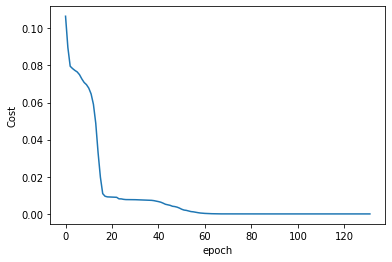

In [ ]:
import matplotlib.pyplot as plt
plt.plot(T.J)
plt.xlabel('epoch')
plt.ylabel('Cost')
plt.show()     

# Backpropagation 리뷰 with Math

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note2_image/bp1.png">

---

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note2_image/bp2.png">

---

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note2_image/bp3.png">

---

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note2_image/bp4.png">

---

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note2_image/bp5.png">

# Keras를 이용한 역전파 실습

> 케라스(https://keras.io)는 거의 모든 종류의 딥러닝 모델을 간편하게 만들고 훈련시킬 수 있는 파이썬 딥러닝 프레임워크입니다.

> 케라스는 딥러닝 모델을 만들기 위해 고수준의 구성 요소를 제공하는 모델 수준의 라이브러리입니다. 텐서조작이나, 미분 같은 저수준 연산을 다루지는 않지만 여러 백엔드 엔진(Tensorflow, Theano, Microsoft Cognitive Toolkit(CNTK))에서 제공하는 특화된 텐서 라이브러리를 사용합니다

> 케라스는 CPU, GPU 모두 동일한 코드로 실행할 수 있습니다. 

> 모델을 정의하는 방법 중 `Sequential` 방법은 가장 자주 사용하는 구조인 층(layer)을 순서대로 쌓아 올린 네트워크 입니다. 이 방법은 다음과 같은 작업 흐름을 가집니다.

1. 학습 데이터 로드
2. 모델 정의
3. 컴파일(Compile)
4. 모델 학습(Fit)
5. 모델 검증(Evaluate)

앞으로 케라스로 신경망을 만들 때 이 흐름을 잘 기억해 두시기 바랍니다.

In [ ]:
# 앞서 살펴본 선형 데이터를 만들기 위함 함수
def make_samples(n=1000):
    study = np.random.uniform(1, 8, (n, 1))
    sleep = np.random.uniform(1, 8, (n, 1))
    
    y = 5 * study + 2 * sleep + 40
    X = np.append(study, sleep, axis = 1)
    
    # 정규화 
    X = X / np.amax(X, axis = 0)
    
    y = y / 100
    
    return X, y

In [ ]:
X, y = make_samples()
X[:10]

array([[0.672565  , 0.42238856],
       [0.97323363, 0.24381067],
       [0.8557785 , 0.88345034],
       [0.83207519, 0.31499139],
       [0.19190866, 0.39500844],
       [0.36873168, 0.9298016 ],
       [0.54998928, 0.42140544],
       [0.35092421, 0.90098679],
       [0.95003539, 0.31561303],
       [0.56156861, 0.664045  ]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
model = Sequential()

# 신경망 모델 구조 정의
model.add(Dense(3, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성을 마무리 합니다.
model.compile(optimizer='sgd', loss='mse', metrics=['mae', 'mse'])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # 분류인 경우 예시

results = model.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 887us/step - loss: 0.0219 - mae: 0.1227 - mse: 0.0219
Epoch 2/100
32/32 [==============================] - 0s 908us/step - loss: 0.0201 - mae: 0.1166 - mse: 0.0201
Epoch 3/100
32/32 [==============================] - 0s 852us/step - loss: 0.0185 - mae: 0.1115 - mse: 0.0185
Epoch 4/100
32/32 [==============================] - 0s 867us/step - loss: 0.0171 - mae: 0.1069 - mse: 0.0171
Epoch 5/100
32/32 [==============================] - 0s 853us/step - loss: 0.0160 - mae: 0.1031 - mse: 0.0160
Epoch 6/100
32/32 [==============================] - 0s 894us/step - loss: 0.0150 - mae: 0.0998 - mse: 0.0150
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0141 - mae: 0.0968 - mse: 0.0141
Epoch 8/100
32/32 [==============================] - 0s 900us/step - loss: 0.0134 - mae: 0.0944 - mse: 0.0134
Epoch 9/100
32/32 [==============================] - 0s 898us/step - loss: 0.0127 - mae: 0.0922 - mse: 0.0127
Epoch 10/100

In [ ]:
results.history.keys()

dict_keys(['loss', 'mae', 'mse'])

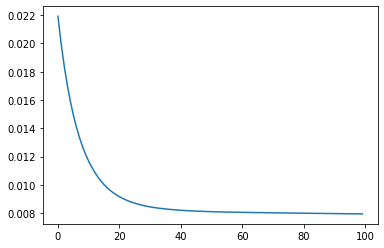

In [ ]:
plt.plot(results.history['loss'])

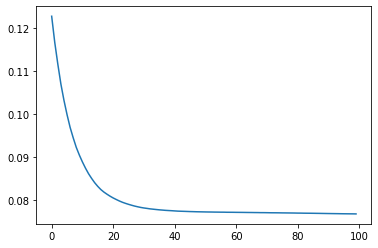

In [ ]:
plt.plot(results.history['mae'])

## Fashion MNIST 를 사용해 신경망 실습
여기서는 tensorflow에서 제공하는 Fashine MNIST 이미지 데이터를 사용해 간단한 신경망 분류기를 만들어 보겠습니다.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [ ]:
# 데이터를 정규화 합니다
X_train = X_train / 255.
X_test = X_test /255.

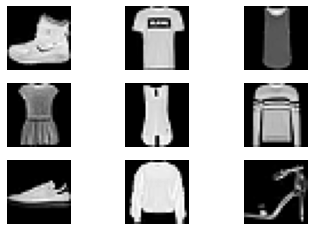

In [ ]:
import matplotlib.pyplot as plt

for i in range(9):
    # subplot 정의
    plt.subplot(3, 3, i+1)
    
    # 데이터를 plot 합니다.
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    
plt.show()
    

In [ ]:
# 클래스를 확인합니다.
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


model = Sequential() 
model.add(Flatten(input_shape=(28, 28))) # 28*28 = 784 특성 벡터로 펼쳐 변환해 Dense 층으로 들어갑니다
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam'
             , loss='sparse_categorical_crossentropy'
             , metrics=['accuracy'])

model.summary()
# 총 7850 parameters (10 bias)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습
model.fit(X_train, y_train, epochs=1, validation_data=(X_test,y_test))
# model.fit(X_train, y_train, epochs=5)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.6049 - accuracy: 0.7944 - val_loss: 0.5048 - val_accuracy: 0.8271


In [ ]:
# 예측
model.predict(X_test[0:1])

array([[1.2839256e-05, 5.4002344e-06, 2.1238816e-04, 4.1775391e-05,
        2.8215486e-04, 1.0097009e-01, 9.8816774e-05, 3.3001626e-01,
        8.6727208e-03, 5.5968761e-01]], dtype=float32)

In [ ]:
# 테스트 데이터 예측 정확도
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.5048 - accuracy: 0.8271


# Review

- 신경망 학습에서 가장 어려운 파트를 배웠습니다. 한번에 이해가 되지 않는 부분이기 때문에, 참고자료 영상을 찾아보시고, 나름대로 이해를 해보시면 좋을 것 같습니다. 
  - 1) NN에서 사용할 parameter를 임의로 생성한다
  - 2) 생성된 파라미터를 이용하여 NN(Forward Network)에 넣고 결과를 얻는다.
  - 3) 얻어진 결과와 타겟(label)과 비교하여 Loss를 계산한다.
  - 4) Loss의 Gradient를 계산해서 역방향으로 parameter를 업데이트(BP)한다.
  - 5) 얼마큼씩 업데이트 할 지 정한다. Stochastic or Batch 

### 참고자료
- [Neural network learning by Andrew Ng](https://www.coursera.org/learn/machine-learning/lecture/Wh6s3/putting-it-together)
- [3Blue1Brown-역전파 미적분, 심층 학습, 4장](https://youtu.be/tIeHLnjs5U8)
- [Neural Networks Demystified [Part 4: Backpropagation]](https://youtu.be/GlcnxUlrtek)
- [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)


